# Non-Markovianity estimations
## (for spin-boson system using Breuer measure approximation)  

In [1]:
using LinearAlgebra
using Combinatorics
using Plots
using HDF5

include("LiPoSID.jl")

Main.LiPoSID

Trace distance:

$D(\rho_1, \rho_2) = \frac{1}{2} \operatorname{Tr}|\rho_1 - \rho_2|$,

where $|A| = \sqrt{A^\dagger A}$

Non-Markovianity:

(H.-P. Breuer, E.-M. Laine, J. Piilo, "Measure for the Degree of Non-Markovian Behavior of Quantum Processes in Open Systems," Physical Review Letters, 2009.)

$\sigma = \frac{dD}{dt}$

$ \mathcal{N} = \max_{\rho_1(0), \rho_2(0)}{\int_{\sigma>0}{\sigma dt}} $

In [2]:
#Test trace distance function

ρ₁ = [1 im
      -im 0]

ρ₂ = [.99 im
      -im .01]      

LiPoSID.TrDist(ρ₁, ρ₂)

0.010000000000000005

In [3]:
function NonMarkovianityBasis(file_name, γᵢ)
    N=[]
    for (i,j)  in combinations(1:4, 2)
        t₁, ρs₁ = LiPoSID.read_timeevolution(file_name, state[i],γᵢ)
        t₂, ρs₂ = LiPoSID.read_timeevolution(file_name, state[j],γᵢ)
        dD = diff([LiPoSID.TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
        append!(N,sum(dD[dD.>0]))
    end
    maximum(N)
end   

NonMarkovianityBasis (generic function with 1 method)

In [4]:
function NonMarkovianity(file_name, states, γᵢ)
    N=[]
    for (i,j)  in combinations(1:length(states), 2)
        t₁, ρs₁ = LiPoSID.read_timeevolution(file_name, states[i],γᵢ)
        t₂, ρs₂ = LiPoSID.read_timeevolution(file_name, states[j],γᵢ)
        dD = diff([LiPoSID.TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
        append!(N, sum(dD[dD.>0]))
    end
    maximum(N)
end  

NonMarkovianity (generic function with 1 method)

In [5]:
file_name = "DATA/ALL_GAMMAS_B4_D10.h5"

"DATA/ALL_GAMMAS_B4_D10.h5"

In [6]:
dodeca_10_states = ["D"*string(n) for n=1:10];
basis_states = ["B"*string(n) for n=1:4];

all_states = vcat(basis_states, dodeca_10_states);

In [7]:
γ = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

NonMarkovianity(file_name, all_states[1:3], γ[end])

0.0006399448334512003

In [8]:
N = [NonMarkovianity(file_name, all_states, γᵢ) for γᵢ in γ]

8-element Vector{Float64}:
 0.00015420954551698118
 0.012929146711576078
 5.91358315071705e-5
 0.0007101884113623752
 0.03463243512167516
 0.04187746492180401
 0.003017747776987354
 0.0006399448334512003

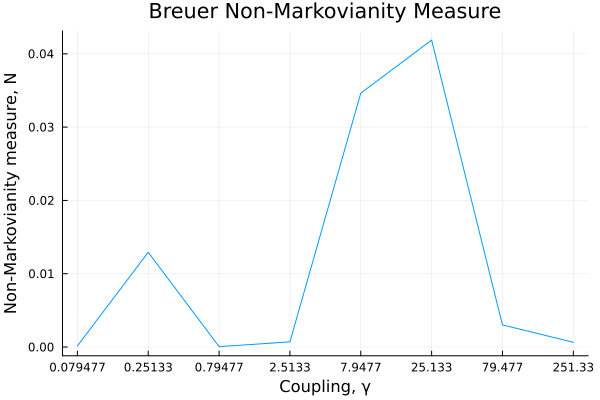

In [9]:
# Plot the data
plot(N, xticks=(1:length(γ), γ), legend=false)

# Set labels
xlabel!("Coupling, γ")
ylabel!("Non-Markovianity measure, N")

# Optionally set a title
title!("Breuer Non-Markovianity Measure")

# Save the figure to a file
#savefig("NonMarkovianity.png")


In [10]:
using PyCall

# Import the pickle module from Python
pickle = pyimport("pickle")

# Use Python's built-in open function to open the file in binary write mode
pyopen = pyimport("builtins").open

# Open a file in write-binary mode using Python's open function
file = pyopen("NonMark.pkl", "wb")

# Use pickle's dump function to save the array
pickle.dump(NaN16, file)

# Close the file
file.close()